In [14]:
# 필요한 모듈들
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcl
%matplotlib inline   
import xlrd
import wbgapi as wb
from gedaTools import *

In [4]:
vawDT = wb.data.DataFrame(['SG.VAW.ARGU.ZS', 'SG.VAW.BURN.ZS',\
    'SG.VAW.GOES.ZS', 'SG.VAW.NEGL.ZS', 'SG.VAW.REFU.ZS'], skipBlanks=True, columns='series')

In [5]:
vawDT

SG.VAW.ARGU.ZS  SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  \
economy time                                                     
AFG     YR2015            59.2            18.2            66.9   
AGO     YR2016            15.2            10.5            14.5   
ALB     YR2005             8.7             3.1            17.0   
        YR2009            12.1             4.4            18.6   
        YR2018             1.8             0.8             3.7   
...                        ...             ...             ...   
ZMB     YR2018            32.2            21.3            26.0   
ZWE     YR1999            31.7            12.0            27.8   
        YR2006            26.0            12.2            33.0   
        YR2011            15.6             7.5            22.3   
        YR2015            16.7             8.1            22.8   

                SG.VAW.NEGL.ZS  SG.VAW.REFU.ZS  
economy time                                    
AFG     YR2015            48.4            33.4  
AGO     YR2016            16.3            11.5  
ALB     YR2005            19.6             8.7  
        YR2009            21.7             8.9  
        YR2018             5.2             0.9  
...                        ...             ...  
ZMB     YR2018            31.3            29.5  
ZWE     YR1999            31.2            22.3  
        YR2006            30.2            24.3  
        YR2011            21.4            16.9  
        YR2015            21.4            14.5  

[196 rows x 5 columns]

In [6]:
vawEduDT = wb.data.DataFrame(['SG.VAW.ARGU.ZS', 'SG.VAW.BURN.ZS',\
    'SG.VAW.GOES.ZS', 'SG.VAW.NEGL.ZS', 'SG.VAW.REFU.ZS',\
    'SE.TER.CUAT.BA.MA.ZS', 'SE.TER.CUAT.BA.FE.ZS'], skipBlanks=True, columns='series')

In [7]:
vawEduDT

SE.TER.CUAT.BA.FE.ZS  SE.TER.CUAT.BA.MA.ZS  SG.VAW.ARGU.ZS  \
economy time                                                                 
AFG     YR2015                   NaN                   NaN            59.2   
AGO     YR2014               2.00061               3.34245             NaN   
        YR2016                   NaN                   NaN            15.2   
ALB     YR2005                   NaN                   NaN             8.7   
        YR2009                   NaN                   NaN            12.1   
...                              ...                   ...             ...   
ZWE     YR1999                   NaN                   NaN            31.7   
        YR2006                   NaN                   NaN            26.0   
        YR2011                   NaN                   NaN            15.6   
        YR2015                   NaN                   NaN            16.7   
        YR2017               2.46643               4.14393             NaN   

                SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  SG.VAW.NEGL.ZS  SG.VAW.REFU.ZS  
economy time                                                                    
AFG     YR2015            18.2            66.9            48.4            33.4  
AGO     YR2014             NaN             NaN             NaN             NaN  
        YR2016            10.5            14.5            16.3            11.5  
ALB     YR2005             3.1            17.0            19.6             8.7  
        YR2009             4.4            18.6            21.7             8.9  
...                        ...             ...             ...             ...  
ZWE     YR1999            12.0            27.8            31.2            22.3  
        YR2006            12.2            33.0            30.2            24.3  
        YR2011             7.5            22.3            21.4            16.9  
        YR2015             8.1            22.8            21.4            14.5  
        YR2017             NaN             NaN             NaN             NaN  

[692 rows x 7 columns]

In [10]:
vawGenDT = vawEduDT.dropna(how='any')

In [11]:
vawGenDT

SE.TER.CUAT.BA.FE.ZS  SE.TER.CUAT.BA.MA.ZS  SG.VAW.ARGU.ZS  \
economy time                                                                 
BDI     YR2017               0.46998              1.401230            30.1   
BGD     YR2011               3.05581              8.382500            22.4   
        YR2014               3.76830              7.971080            19.9   
        YR2018               6.35262             12.501610            13.7   
COL     YR2010               9.37960              9.572760             0.4   
        YR2015              10.56403             10.023190             1.3   
GIN     YR2018               2.65402             10.293160            49.0   
HND     YR2012               4.02971              4.513940             4.8   
MLI     YR2018               1.00082              3.595650            68.5   
NER     YR2012               0.57368              1.622220            50.4   
NPL     YR2011               2.23697              7.303640             0.5   
PHL     YR2013              19.23904             14.710330             3.0   
        YR2017              18.80533             13.192660             2.2   
SEN     YR2011               1.08880              3.294100            44.5   
        YR2013               1.80182              4.541880            48.1   
        YR2017               0.90232              4.794420            35.4   
TJK     YR2017               7.13522             16.940929            52.3   

                SG.VAW.BURN.ZS  SG.VAW.GOES.ZS  SG.VAW.NEGL.ZS  SG.VAW.REFU.ZS  
economy time                                                                    
BDI     YR2017            22.0            39.2            51.8            41.8  
BGD     YR2011             4.1            17.3            18.8             8.1  
        YR2014             4.3            14.4            14.9             7.2  
        YR2018             1.2             7.7             9.8             2.9  
COL     YR2010             0.2             0.3             1.9             0.2  
        YR2015             1.1             1.2             2.4             1.1  
GIN     YR2018            23.6            53.8            52.3            47.7  
HND     YR2012             4.2             4.3             9.5             2.3  
MLI     YR2018            22.6            53.8            51.7            62.8  
NER     YR2012            34.6            42.7            42.0            50.1  
NPL     YR2011             0.1             0.5             0.7             0.2  
PHL     YR2013             1.8             4.3            10.6             1.6  
        YR2017             1.3             3.4             8.6             1.3  
SEN     YR2011            24.4            39.9            40.1            46.0  
        YR2013            18.7            46.2            45.2            47.4  
        YR2017            22.1            33.2            35.4            35.2  
TJK     YR2017            29.6            51.3            49.9            26.7

In [12]:
vawGenRST = vawGenDT.reset_index()

In [18]:
vawGenRST['time'] = timeToInt(vawGenRST)

In [28]:
vawGenRST.iloc[:,2:]

,SE.TER.CUAT.BA.FE.ZS,SE.TER.CUAT.BA.MA.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS
0,0.46998,1.401230,30.1,22.0,39.2,51.8,41.8
1,3.05581,8.382500,22.4,4.1,17.3,18.8,8.1
2,3.76830,7.971080,19.9,4.3,14.4,14.9,7.2
3,6.35262,12.501610,13.7,1.2,7.7,9.8,2.9
4,9.37960,9.572760,0.4,0.2,0.3,1.9,0.2
5,10.56403,10.023190,1.3,1.1,1.2,2.4,1.1
6,2.65402,10.293160,49.0,23.6,53.8,52.3,47.7
7,4.02971,4.513940,4.8,4.2,4.3,9.5,2.3
8,1.00082,3.595650,68.5,22.6,53.8,51.7,62.8
9,0.57368,1.622220,50.4,34.6,42.7,42.0,50.1


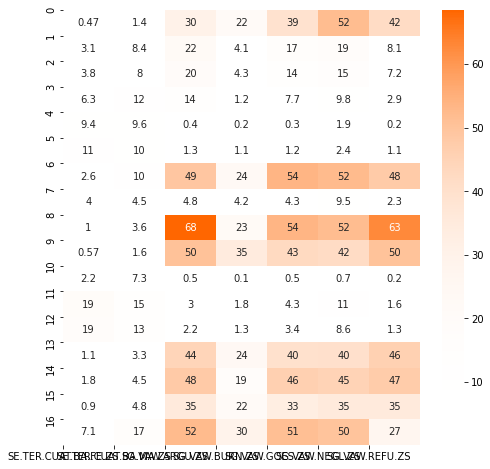

In [27]:
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

h = 24
s = 0.99
v = 1

colors = [mcl.hsv_to_rgb((h/360,0,v)),
          mcl.hsv_to_rgb((h/360,0.5,v)),
          mcl.hsv_to_rgb((h/360, 1, v))]

cmap = mcl.LinearSegmentedColormap.from_list('my_cmap', colors, gamma=3)

round_func = np.vectorize(lambda x : round(x,2))
sns.heatmap(round_func(vawGenRST.iloc[:,2:].values), cmap=cmap, annot=True)
plt.xticks(5,vawGenRST.iloc[:,3:].columns) ## x축 눈금 생성
plt.yticks(2, vawGenRST.iloc[:,0:2].index) ## y축 눈금 생성
plt.show()
